<a href="https://colab.research.google.com/github/srikaranreddy13/Data-Science/blob/main/Bengaluru_Hose_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [ ]:
print(df.tail())

                  area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
13317        Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13318  Super built-up  Area         18-Jun        Padmanabhanagar      4 BHK   
13319  Super built-up  Area  Ready To Move           Doddathoguru      1 BHK   

       society total_sqft  bath  balcony  price  
13315  ArsiaEx       3453   4.0      0.0  231.0  
13316      NaN       3600   5.0      NaN  400.0  
13317  Mahla T       1141   2.0      1.0   60.0  
13318  SollyCl       4689   4.0      1.0  488.0  
13319      NaN        550   1.0      1.0   17.0  


In [ ]:
df.shape

(13320, 9)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [ ]:
# task-2
print(df.isnull())
print(df.isnull().sum())

       area_type  availability  location   size  society  total_sqft   bath  \
0          False         False     False  False    False       False  False   
1          False         False     False  False    False       False  False   
2          False         False     False  False     True       False  False   
3          False         False     False  False    False       False  False   
4          False         False     False  False     True       False  False   
...          ...           ...       ...    ...      ...         ...    ...   
13315      False         False     False  False    False       False  False   
13316      False         False     False  False     True       False  False   
13317      False         False     False  False    False       False  False   
13318      False         False     False  False    False       False  False   
13319      False         False     False  False     True       False  False   

       balcony  price  
0        False  False  
1  

In [ ]:
df.isnull().sum()
df.drop(['society'],axis=1,inplace=True,errors='ignore')
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)
# total_sqft cleanup
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()


/tmp/ipython-input-1726106092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)
/tmp/ipython-input-1726106092.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [ ]:
#task-3
#unique locations
df['location'].unique()
df['location'].nunique()


1299

In [ ]:
avg_price_location = df.groupby('location')['price'].mean()
avg_price_location


,price
location,
Anekal,16.000000
Banaswadi,35.000000
Basavangudi,50.000000
Bhoganhalli,22.890000
Devarabeesana Halli,124.833333
...,...
t.c palya,160.000000
tc.palya,60.750000
vinayakanagar,200.000000


In [ ]:
import numpy as np
import re

# 1) Clean total_sqft (convert to numeric)
def convert_sqft(x):
    x = str(x)

    # Case 1: if numeric, return directly
    if re.match(r'^\d+(\.\d+)?$', x):
        return float(x)

    # Case 2: if it's a range like "2100 - 2850"
    if '-' in x:
        a, b = x.split('-')
        try:
            return (float(a) + float(b)) / 2
        except:
            return np.nan

    # Case 3: extract first number (e.g., "34.46Sq. Meter")
    match = re.search(r'(\d+(\.\d+)?)', x)
    if match:
        return float(match.group(1))

    return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# Convert numeric columns safely
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# Drop rows where total_sqft or price is missing
df = df.dropna(subset=['total_sqft', 'price'])

# 1) How many unique locations?
print("1) Number of unique locations:", df['location'].nunique())

# 2) Average house price per location
avg_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
print("\n2) Average price per location (Top 10):")
print(avg_price.head(10))

# 3) Location with highest average price
top_loc = avg_price.idxmax()
top_price = avg_price.max()
print(f"\n3) Highest average price location: {top_loc} — {top_price:.2f} lakhs")

# 4) Correlation between sqft, bath, price
corr = df[['total_sqft', 'bath', 'price']].corr()
print("\n4) Correlation:\n", corr)

# 5) Interpretation (simple logic)
corr_sqft_price = corr.loc['total_sqft', 'price']
print("\n5) Interpretation:")

if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")


1) Number of unique locations: 1299

2) Average price per location (Top 10):
location
Cubbon Road            1900.000000
Ashok Nagar            1486.000000
Defence Colony         1167.714286
Yemlur                 1093.388889
Church Street          1068.000000
D Souza Layout         1015.000000
Sadashiva Nagar        1011.100000
Sindhi Colony           988.000000
Srinivas Colony         922.000000
5th Block Jayanagar     905.000000
Name: price, dtype: float64

3) Highest average price location: Cubbon Road — 1900.00 lakhs

4) Correlation:
             total_sqft      bath     price
total_sqft    1.000000  0.385367  0.573858
bath          0.385367  1.000000  0.450564
price         0.573858  0.450564  1.000000

5) Interpretation:
• Moderate correlation → Larger houses often cost more, but not always.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


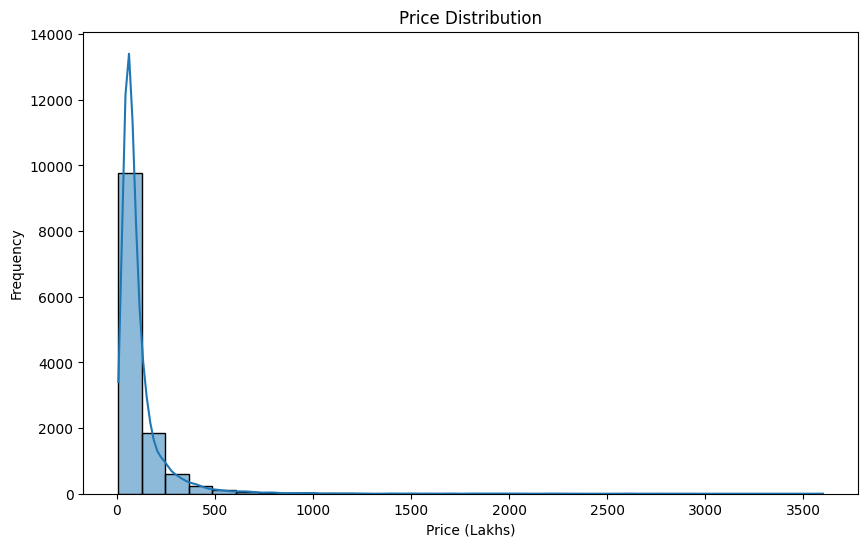

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Frequency")
plt.show()


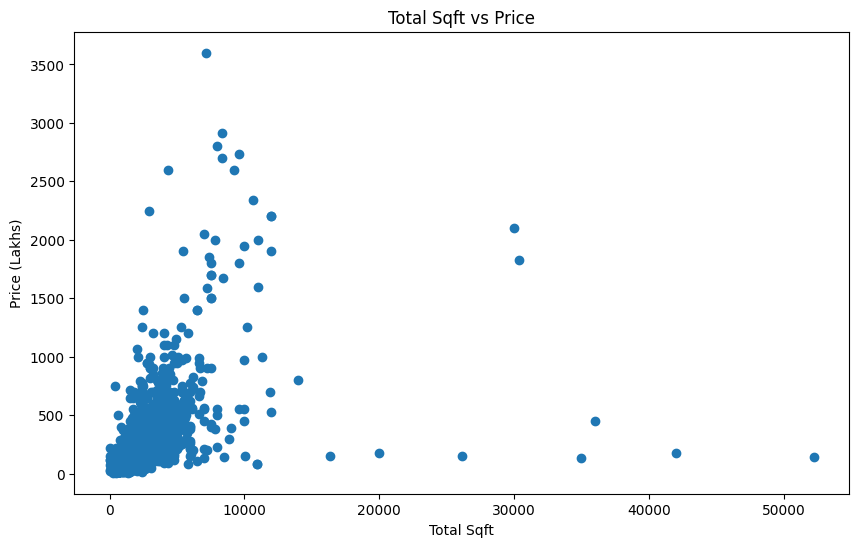

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['total_sqft'], df['price'])
plt.title("Total Sqft vs Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price (Lakhs)")
plt.show()


<Axes: xlabel='total_sqft', ylabel='price'>

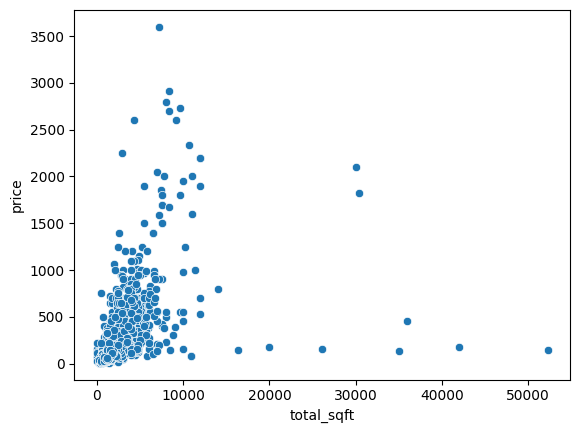

In [ ]:
sns.scatterplot(data=df, x='total_sqft', y='price')


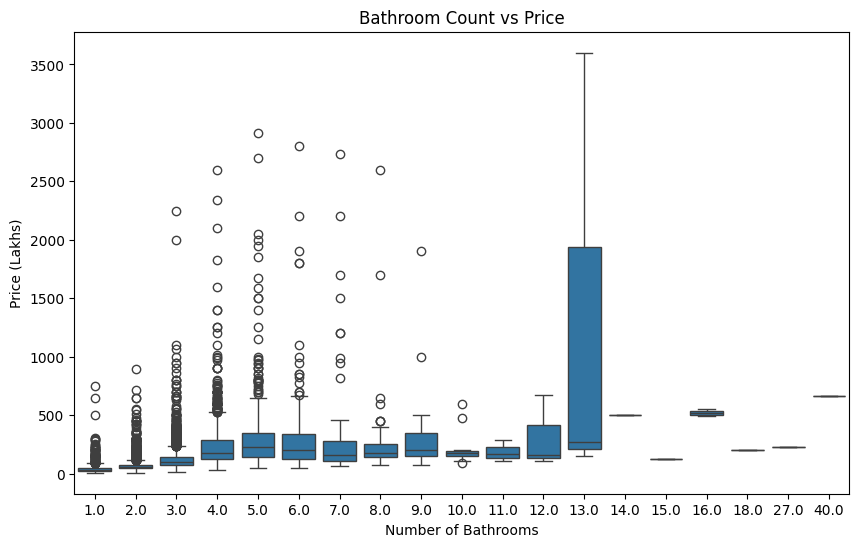

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='bath', y='price')
plt.title("Bathroom Count vs Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (Lakhs)")
plt.show()


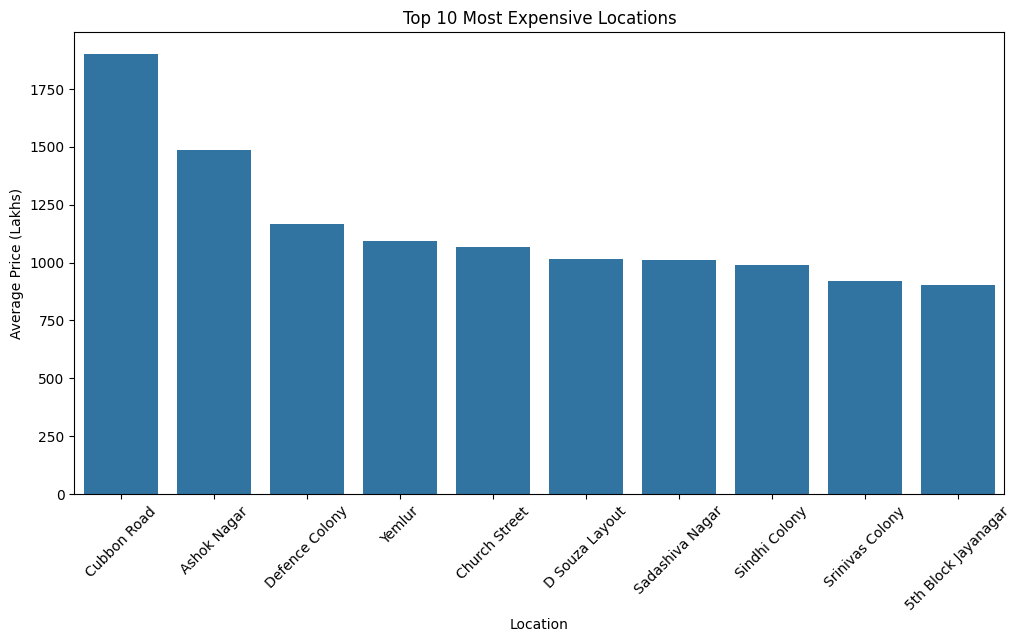

In [ ]:
# Compute average prices
location_avg = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=location_avg.index, y=location_avg.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Expensive Locations")
plt.xlabel("Location")
plt.ylabel("Average Price (Lakhs)")
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


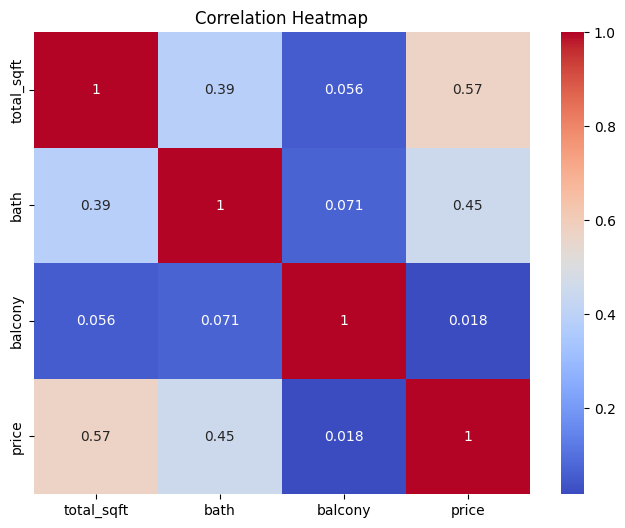

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.isnull()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
12701,False,False,False,False,False,False,False,False
12702,False,False,False,False,False,False,False,False
12703,False,False,False,False,False,False,False,False
12704,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [ ]:
df.to_csv("cleaned_house_price.csv", index=False)
print("CSV file created successfully!")


CSV file created successfully!


In [ ]:
df.to_csv('/content/drive/MyDrive/cleaned_house_price.csv', index=False)
print("File successfully saved in Google Drive as cleaned_house_price.csv")


File successfully saved in Google Drive as cleaned_house_price.csv


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cleaned_house_price.csv')
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  
2      1440.0   2.0      3.0   62.00  
3      1521.0   3.0      1.0   95.00  
4      1200.0   2.0      1.0   51.00  


In [ ]:
# data analysis of new data set
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
